In [5]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#1.타이타닉 데이터의 대략적인 분포 및 특징은 무엇일까?
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

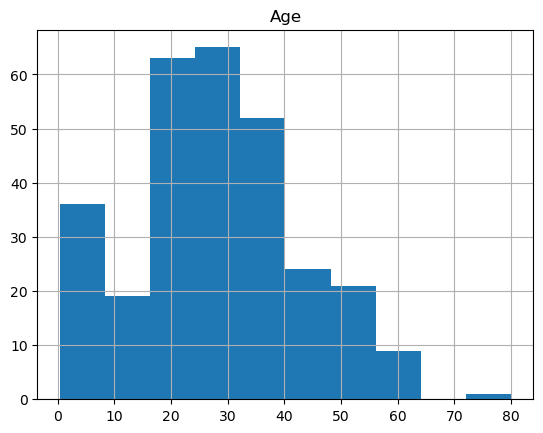

In [13]:
#2.타이타닉 탑승자 중 생존한 자들의 연령 분포는 어떻게 될까?

df1 = df.query('Survived == 1')[['Age']]
df1.hist()

In [45]:
#3.타이타닉 탑승자 중 남성 생존자와 여성 생존자는 각각 몇명인가?

df2 = df.query('Survived == 1')[['Sex']]
df2.value_counts()

Sex   
female    233
male      109
dtype: int64

In [46]:
#4.좌석 등급에 따른 생존자는 몇명인가?

df3 = df.query('Survived == 1')[['Pclass']]
df3.value_counts()

Pclass
1         136
3         119
2          87
dtype: int64

In [78]:
#5.탑승 요금이 평균이상인 탑승자 중에 생존자의 비율은?
Fare_mean = df['Fare'].mean()
#Fare_mean=32.2042079685746

import numpy as np

df['test'] = np.where(df['Fare']>Fare_mean, 'high','low')
df['test'].value_counts()
#전체 탑승객 중 평균 요금관련 정보: high = 211명, low = 680명

df4 = df.query('Survived == 1')[['test']]
df4['test'].value_counts()
#생존자 중 평균 요금 관련 정보: high = 126명, low = 216명

sur_high = (126/211)*100
sur_low = (216/680)*100

print("평균요금보다 높은 요금을 지불한 탑승자 중 생존자의 비율:",sur_high)
print("평균요금보다 낮은 요금을 지불한 탑승자 중 생존자의 비율:",sur_low)

평균요금보다 높은 요금을 지불한 탑승자 중 생존자의 비율: 59.71563981042654
평균요금보다 낮은 요금을 지불한 탑승자 중 생존자의 비율: 31.76470588235294


In [34]:
#6.탑승자의 형제 및 배우자 수 별 요금 평균은 얼마인가?
df['SibSp'].value_counts()

df5 = df[['SibSp','Fare']]
df5.groupby('SibSp').agg(Fare_mean = ('Fare','mean'))

,Fare_mean
SibSp,
0,25.692028
1,44.147370
2,51.753718
3,68.908862
4,31.855556
5,46.900000
8,69.550000


In [87]:
#7.사망자 중 탑승위치 별로 가장 나이가 많은 연령과 나이가 적은 연령은 몇살일까?
df6 = df.query('Survived == 0')[['Age','Pclass']]
df6_1 = df6.groupby('Pclass').agg(age_max = ('Age','max'),
                                 age_min = ('Age','min'))
df6_1

,age_max,age_min
Pclass,,
1,71.0,2.0
2,70.0,16.0
3,74.0,1.0


In [124]:
#8.탑승자 연령대 별 사망자 수는 어떻게 될까?
df7 = df[['Age','Survived']]

print(df7.isnull().sum())
df7['Age'] = df7['Age'].fillna(df7['Age'].mean())

df7_1=df7.assign(age_group = df7['Age']//10)

df7_1.groupby('age_group').agg(died_age_group = ('Survived','count'))


Age         177
Survived      0
dtype: int64


C:\Users\onlyo\AppData\Local\Temp\ipykernel_17508\4044297251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Age'] = df7['Age'].fillna(df7['Age'].mean())


,died_age_group
age_group,
0.0,62
1.0,102
2.0,397
3.0,167
4.0,89
5.0,48
6.0,19
7.0,6
8.0,1


In [133]:
#9.탑승자 중 형제 및 배우자가 있을 때와 없을 때 생존자 수는?
df8 = df.query('Survived == 1 & SibSp != 0')
df8_1 = df.query('Survived == 1 & SibSp == 0')

df8_len = len(df8['Survived'])
df8_1_len = len(df8_1['Survived'])

print(df8_len, df8_1_len)

132 210


In [141]:
#10.탑승 위치에 따른 평균 요금은 어떨까?

df9 = df[['Embarked','Fare']]
df9.groupby('Embarked').agg(Fare_mean = ('Fare','mean'))

,Fare_mean
Embarked,
C,59.954144
Q,13.276030
S,27.079812
